In [47]:
# https://www.kaggle.com/biphili/university-admission-in-era-of-nano-degrees
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


## Knowing the dataset

In [48]:
dataset = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

#### Reviewing 1st five data in the dataset

In [49]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Removig Serial No. column bcoz its not adding any value to datatset. 

In [50]:
dataset.drop(['Serial No.'], axis=1,  inplace=True)

In [51]:
column_names = {'GRE Score': 'gre_score', 'TOEFL Score': 'toefl_score', 'University Rating': 'university_rating', \
                'SOP': 'sop', 'LOR': 'lor', 'CGPA': 'cgpa',\
                'Research': 'research', 'Chance of Admit ': 'chance_of_admit'}

#### Changing column names

In [64]:
dataset = dataset.rename(columns = column_names)
dataset.head()

,gre_score,toefl_score,university_rating,sop,LOR,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Reviewing last five data in the dataset

In [54]:
dataset.tail()

,gre_score,toefl_score,university_rating,sop,LOR,cgpa,research,chance_of_admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


#### Size of dataset

In [8]:
dataset.shape

(500, 8)

In [55]:
dataset.dtypes

gre_score              int64
toefl_score            int64
university_rating      int64
sop                  float64
LOR                  float64
cgpa                 float64
research               int64
chance_of_admit      float64
dtype: object

In [56]:
for data in dataset.columns:
    print(data)
    print(dataset[data].unique())
    print("="*80)

gre_score
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
toefl_score
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
university_rating
[4 3 2 5 1]
sop
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
LOR 
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
cgpa
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8.97 8.33 8.2

#### Five point summury of dataset

In [57]:
dataset.describe()

,gre_score,toefl_score,university_rating,sop,LOR,cgpa,research,chance_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Checking for any null value in dataset

In [58]:
dataset.isnull().any()

gre_score            False
toefl_score          False
university_rating    False
sop                  False
LOR                  False
cgpa                 False
research             False
chance_of_admit      False
dtype: bool

#### Ploting histogram on dataset

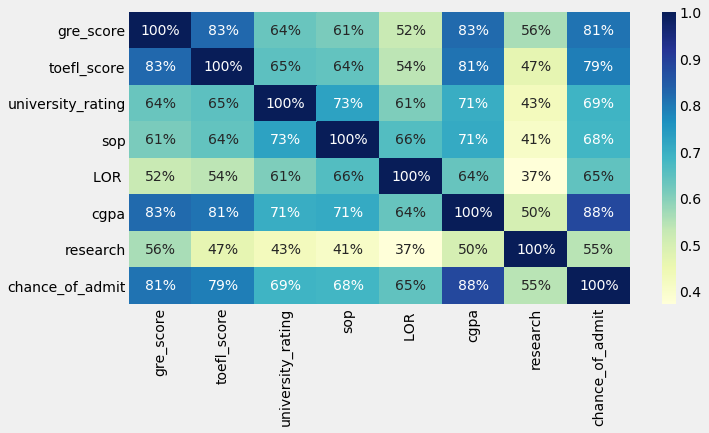

In [61]:
plt.subplots(figsize=(10, 5))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True, fmt= '.0%')
plt.show()

#### Ploting correlation bar graph based on target variable in ascending order. 

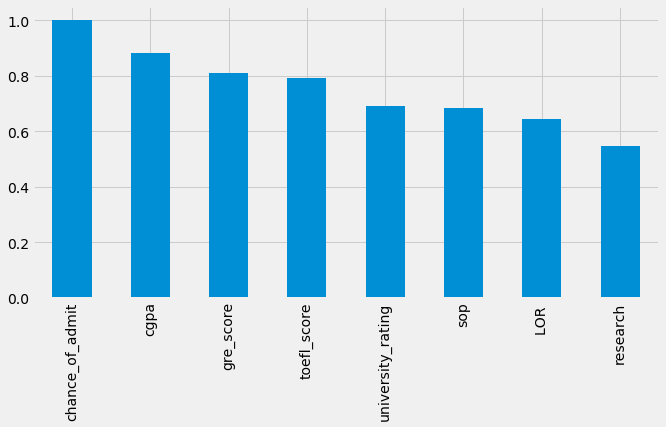

In [62]:
plt.subplots(figsize=(10, 5))
dataset.corr().loc['chance_of_admit'].sort_values(ascending=False).plot(kind='bar')

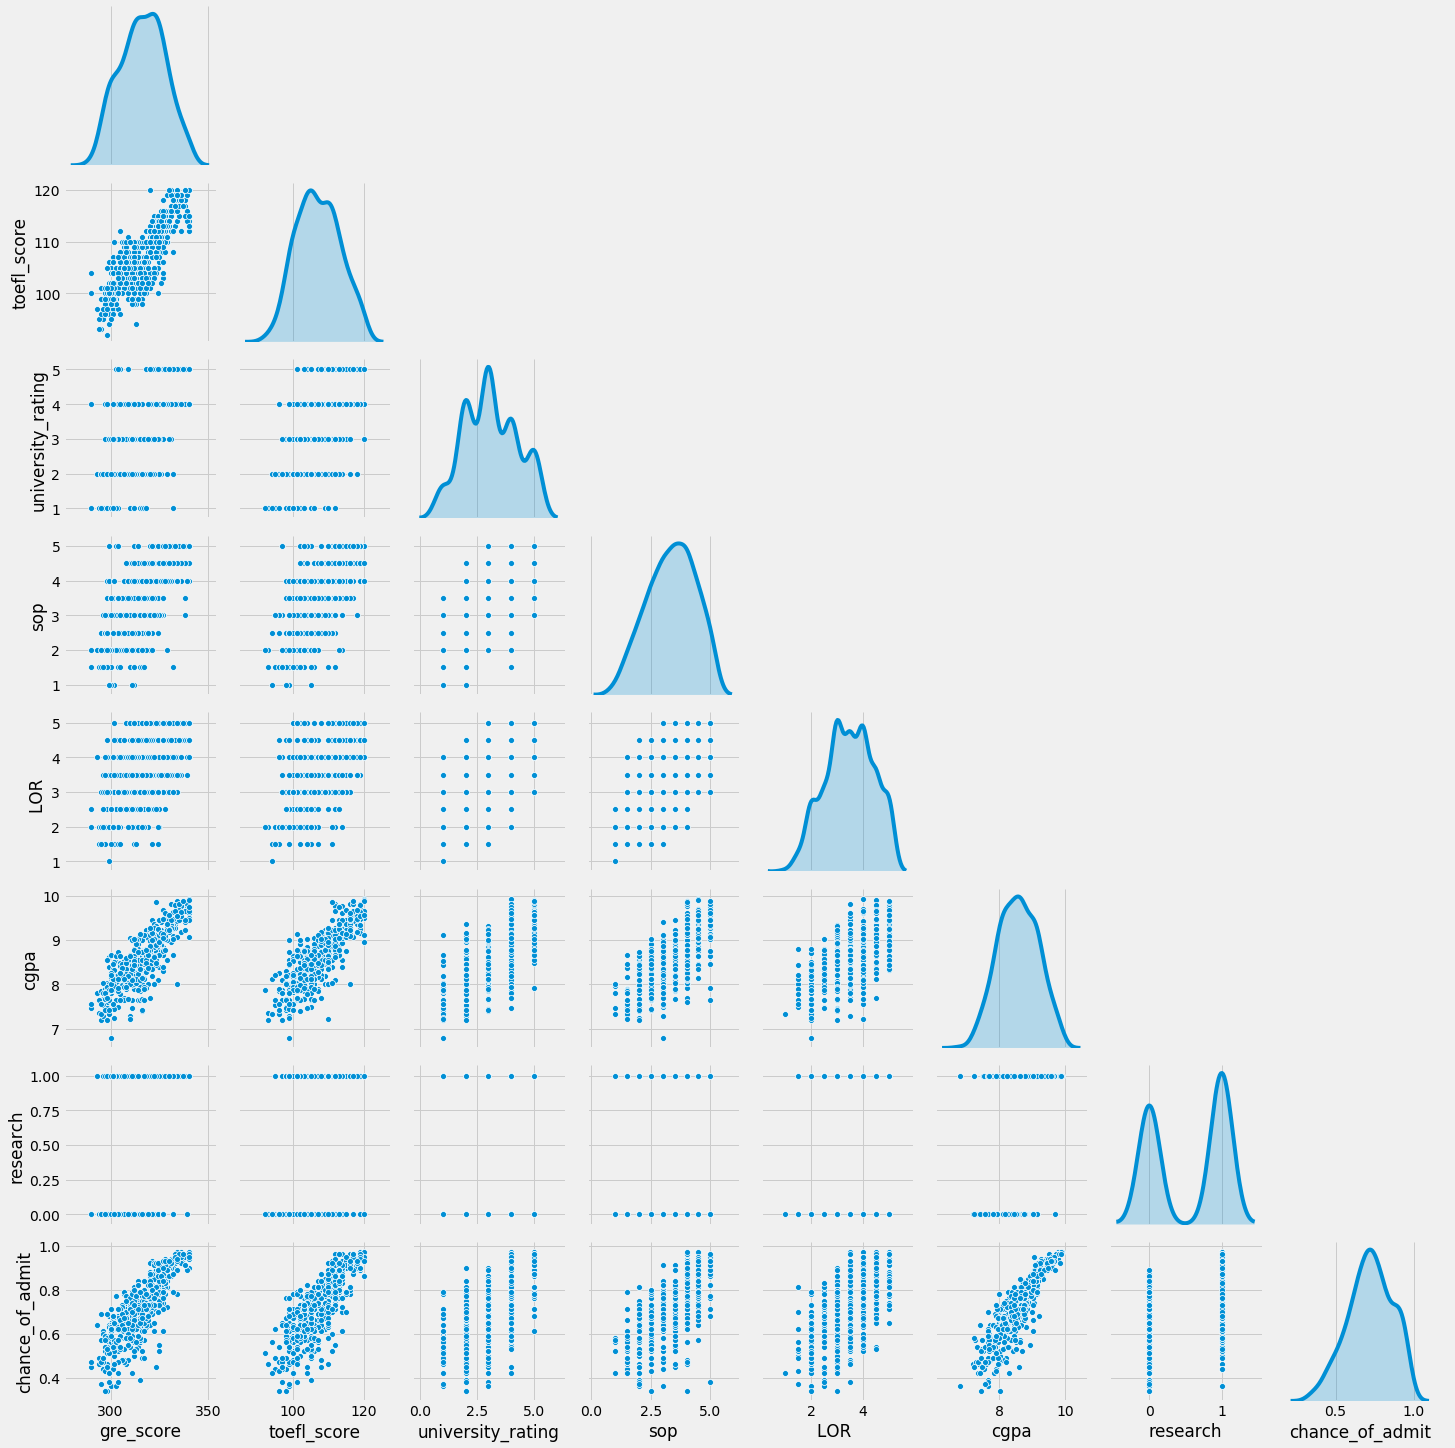

In [63]:
sns.pairplot(dataset, corner=True, diag_kind="kde")

#### How important is Research to get an Admission?

1    0.56
0    0.44
Name: research, dtype: float64


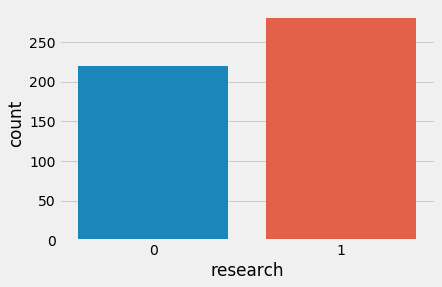

In [75]:
print(f"{dataset['research'].value_counts()/len(dataset)}")
print("="*80)
sns.countplot(dataset['research'])

#### CGPA vs GRE Score Analysis

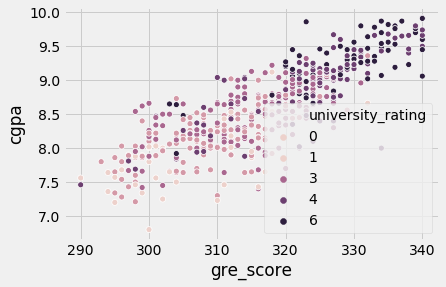

In [81]:
sns.scatterplot(y="cgpa", x="gre_score", hue="university_rating", data=dataset)

In [82]:
sns.scatterplot(y="cgpa", x="gre_score", hue="research", data=dataset)

NameError: name 'admttemp' is not defined

## Model building
#### Create the x and y variable for linear regression problem solving
#### Import the standard scaler library and scale the x data
#### Import the train test split function frm sklearn and create train and test variable with 30% hold out dataset
#### Initialize and fit the linear regression
#### Predict the values from tet dataset
#### Plot the predicated and relevent actual values
#### Create a hitogram of residuals
#### What is R^2 value and what is the interpretation of it
#### Create a small dataset with column and their respective coefficient values
#### Create a datset with predication, target, and residual